# Introduction
This is the notebook demo to show how to use the the `lmdb` to read the data from the lmdb file.
To access the lmdb file, you need mount the data container to the local directory. Refer to the `README.md` in the `dataset` directory.
Support we mount the data in the `../data` folder.

## Directly use LMDB package

In [1]:
import lmdb
import pickle

In [3]:
# Change `../data` to your local mounted data directory
data_file = '../data/dataset/dataset/MD22/AT_AT_CG_CG/radius3_broadcast_rdkit_rmMean_GroupSize4/data.0000.lmdb'
# `subdir` is False because the data file is not in a subdirectory
env = lmdb.open(data_file, readonly=True, subdir=False)

In [4]:
txn = env.begin()
data_length = pickle.loads(txn.get(b'length')) # b'' should be used to convert string to bytes
print(f"Total data length: {data_length}")

Total data length: 318


In [5]:
# Get the data for the first data
torch_data = pickle.loads(txn.get(b'0'))
print(type(torch_data))
print(torch_data.keys())
print(torch_data['energy'])

/anaconda/envs/madft_nn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'torch_geometric.data.data.Data'>
['energy', 'edge_index', 'atomic_numbers', 'forces', 'labels', 'num_labels', 'interaction_graph', 'grouping_graph', 'pos', 'num_nodes']
tensor([[-188.5000]])


[tensor(-188.5000), tensor(-176.5000), tensor(-150.7500), tensor(-129.5000), tensor(-116.7500), tensor(-107.), tensor(-90.7500), tensor(-69.2500), tensor(-57.2500), tensor(-61.5000), tensor(-69.7500), tensor(-68.5000), tensor(-55.7500), tensor(-43.2500), tensor(-38.2500), tensor(-36.2500), tensor(-33.), tensor(-34.), tensor(-36.5000), tensor(-38.7500), tensor(-46.5000), tensor(-55.), tensor(-56.7500), tensor(-51.5000), tensor(-43.5000), tensor(-38.5000), tensor(-41.7500), tensor(-52.), tensor(-55.5000), tensor(-46.7500), tensor(-38.5000), tensor(-41.), tensor(-50.), tensor(-54.2500), tensor(-50.2500), tensor(-43.), tensor(-42.7500), tensor(-53.), tensor(-61.), tensor(-58.5000), tensor(-50.), tensor(-45.7500), tensor(-45.7500), tensor(-44.), tensor(-38.), tensor(-32.7500), tensor(-34.2500), tensor(-39.7500), tensor(-44.5000), tensor(-47.7500), tensor(-50.), tensor(-53.), tensor(-54.2500), tensor(-46.), tensor(-31.7500), tensor(-24.), tensor(-24.7500), tensor(-24.), tensor(-19.7500), ten

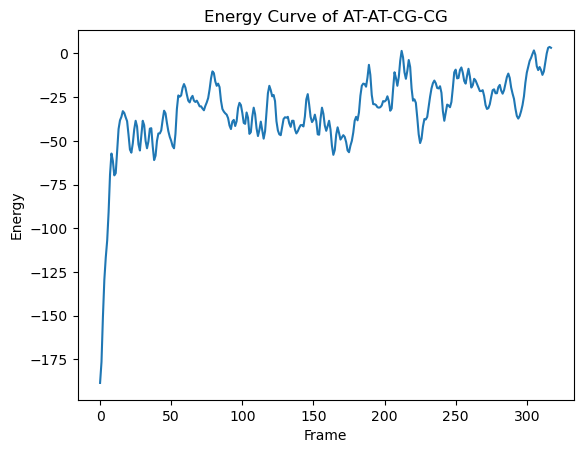

In [6]:
# A demo to show the energy curve
import matplotlib.pyplot as plt
enenrgy_data = []
for i in range(data_length):
    torch_data = pickle.loads(txn.get(str(i).encode("ascii")))
    enenrgy_data.append(torch_data['energy'][0][0])
print(enenrgy_data)
plt.plot(enenrgy_data)
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.title('Energy Curve of AT-AT-CG-CG')
plt.show()

## Use `LmdbDataset` class
When you use the `LmdbDataset` class, you can directly pass the dataset path as parameters and the class will automatically read the data from the lmdb file under this dataset path.

In [7]:
# Add the project root to the system path
import sys
sys.path.append('../src')
from madftnn.dataset.dataset_unified import LmdbDataset

In [12]:
data_path = '/home/weixinran/MADFT-NN/local_files/waters_tzvp_2_10_20_100'
data_set = LmdbDataset(data_path, enable_hami=False)

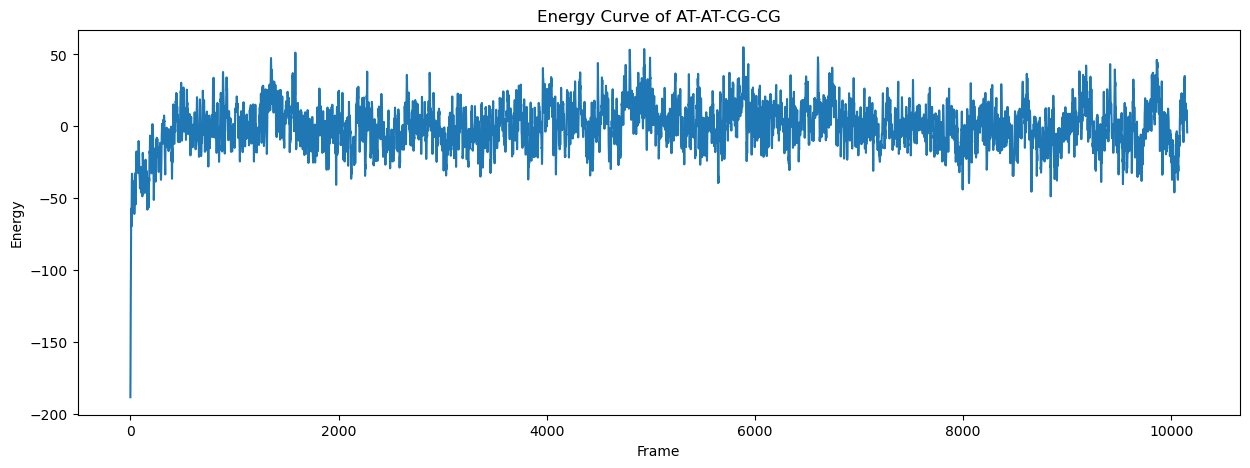

In [13]:
# Draw the energy curve of the whole dataset
import matplotlib.pyplot as plt
enenrgy_data = []
for i in range(len(data_set)):
    torch_data = data_set[i]
    enenrgy_data.append(torch_data['energy'][0][0])

plt.figure(figsize=(15, 5))
plt.plot(enenrgy_data)
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.title('Energy Curve of AT-AT-CG-CG')
plt.show()